# Analyzing the Code Challenges

![A serene crow gazes curiously at the intricate graphs](./code_illustration/graph_overview.jpg)

The primary objective of this notebook is to analyze a file called "code_challenge.csv" that contains a wide array of programming challenges. The challenges cater to different skill levels, offering tasks suitable for beginners and more complex projects for advanced programmers. For instance, challenges may vary from basic calculations like "Calculate age in seconds" to advanced projects like "Game Engine in Unity" or "Ray Tracer."

These diverse problems are specifically designed for learning and practice purposes. Aspiring programmers can select challenges aligned with their proficiency and interests, allowing them to enhance their programming skills and delve into various areas of computer science and software development. Additionally, these challenges serve as valuable resources for educational settings and programming competitions, encouraging continuous learning and skill development within the programming community.

##  Loading, Preprocessing, and Displaying CSV Data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


df = pd.read_csv('code_challenge.csv', delimiter=';', encoding='latin') 

# Drop index column
df = df.reset_index(drop=True) 

# Display dataframe again
display(df)

,id,name,description,difficulty,category
0,0,AI for Roguelikes,AI agents to play procedurally generated games,Intermediate,AI/ML
1,1,ASCII Digital Clock,Digital clock in ASCII art,Beginner,Utilities
2,2,An Audio or Visual 64KB Demonstration,64KB intro with visuals synced to audio,Advanced,Audio/Music
3,3,BMI calculator,Body mass index calculator,Beginner,Utilities
4,4,Basic Bootloader,Bootloader for booting an OS kernel,Intermediate,Computer Science Concepts
...,...,...,...,...,...
218,218,Window Manager,Custom window manager for an OS GUI,Intermediate,Utilities
219,219,Wolfenstein Clone,Clone of Wolfenstein 3D game,Intermediate,Games
220,220,Write an Interpreted LIST-like Programming Lan...,Custom programming language interpreter,Intermediate,Computer Science Concepts
221,221,Yahtzee,Yahtzee dice game,Intermediate,Games


## AI-Driven Data Visualization Recommendations

Since the dataset contains various projects with different attributes, we can create different types of visualizations to gain insights and patterns. Here are some visualization ideas:

1. Bar Chart: Visualize the number of projects in each category.
2. Pie Chart: Show the distribution of projects across different difficulty levels.
3. Count Plot: Display the count of projects for each difficulty level.
4. Scatter Plot: Explore the relationship between project ID and difficulty level.
5. Word Cloud: Create a word cloud from project names to visualize the most common terms.
6. Histogram: Visualize the distribution of projects based on their difficulty levels.
7. Stacked Bar Chart: Compare the distribution of categories within each difficulty level.
8. Heatmap: Show the correlation between categories and difficulty levels.
9. Box Plot: Visualize the spread of projects' difficulty levels within each category.
10. Grouped Bar Chart: Compare the number of projects in each difficulty level for different categories.

To create these visualizations in Pandas, you can use libraries like Matplotlib or Seaborn. Here's an example of how you can create some of these visualizations:


# Bar Chart - Number of projects in each category

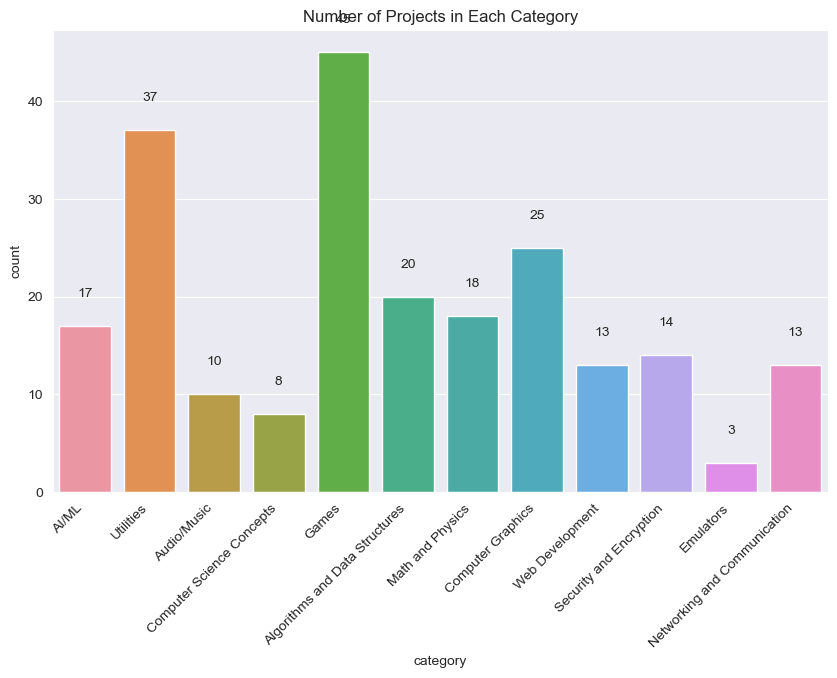

In [6]:
# Prepare the figure and plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(data=df, x='category')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Projects in Each Category')

# Display values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,  # 3 units above bar
            '{}'.format(int(height)),
            ha="center")

plt.show()

# Pie Chart - Distribution of projects across different difficulty levels

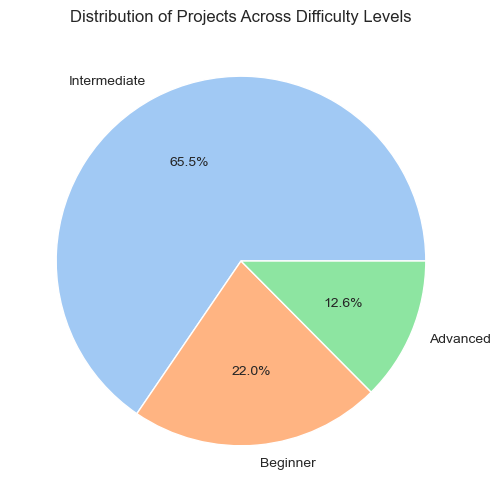

In [4]:
# Prepare the figure and set Seaborn style
value_counts = df['difficulty'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel')[0:len(value_counts)])
plt.title('Distribution of Projects Across Difficulty Levels')
plt.show()

# Count Plot - Count of projects for each difficulty level

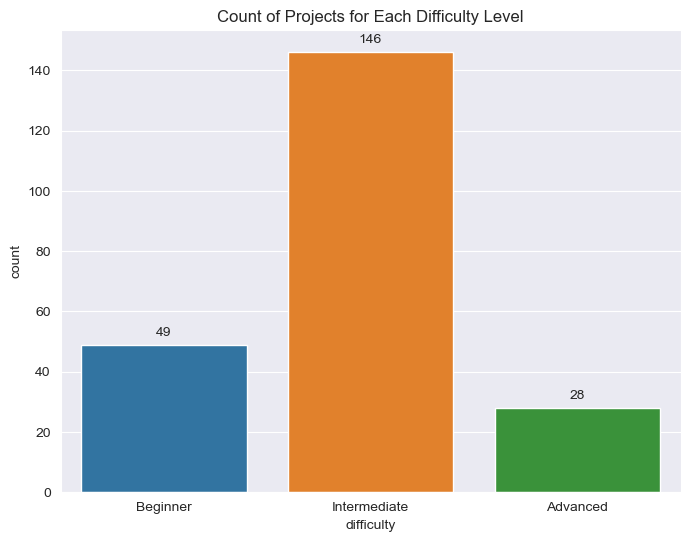

In [9]:
# Prepare the figure and set Seaborn style
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Create countplot with a specific order for 'difficulty'
ax = sns.countplot(data=df, x='difficulty', order=['Beginner', 'Intermediate', 'Advanced'])

# Set the title for the plot
plt.title('Count of Projects for Each Difficulty Level')

# Display values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            '{}'.format(int(height)),  # Ensure no decimals
            ha="center")

plt.show()


# Scatter Plot - Relationship between project ID and difficulty level

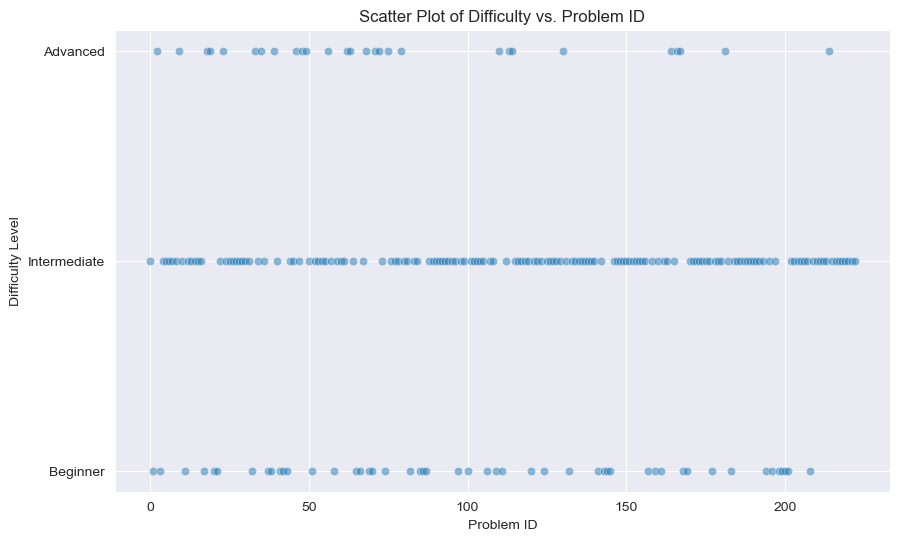

In [10]:
# Prepare the figure and set Seaborn style
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Map the 'difficulty' column to corresponding numbers
df['numeric_difficulty'] = df['difficulty'].map({'Beginner': 1, 'Intermediate': 2, 'Advanced': 3})

# Create scatter plot with Seaborn
sns.scatterplot(x=df.index, y='numeric_difficulty', data=df, alpha=0.5)

# Set title and labels
plt.title('Scatter Plot of Difficulty vs. Problem ID')
plt.xlabel('Problem ID')
plt.ylabel('Difficulty Level')
plt.yticks([1, 2, 3], ['Beginner', 'Intermediate', 'Advanced'])

plt.show()


# Word Cloud - Word cloud of project names

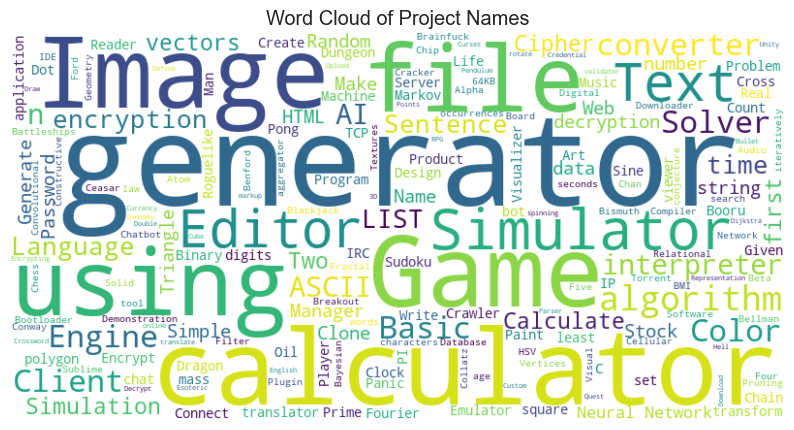

In [15]:
# Set Seaborn style
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2)  # This will set the scale for the title font among others

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['name']))

# Display word cloud with Seaborn-styled aesthetics
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Project Names')
plt.show()


# Stacked Bar Chart - Distribution of categories within each difficulty level

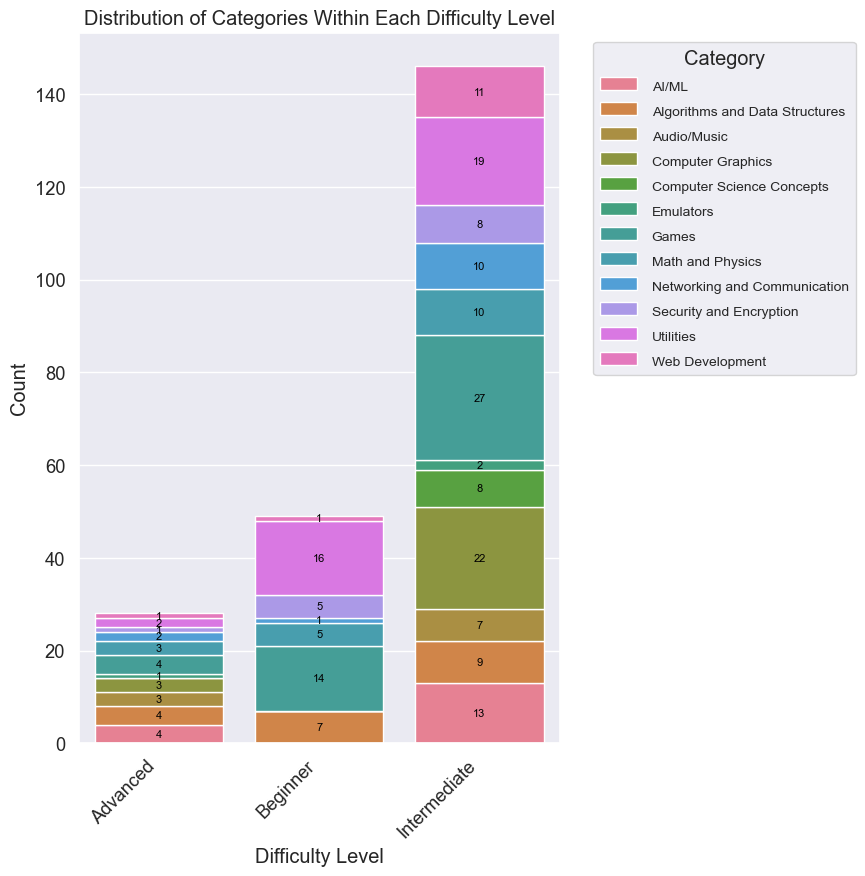

In [50]:
# Assuming you have the crosstab data
ct = pd.crosstab(df['difficulty'], df['category'])

# Convert crosstab dataframe into a long format suitable for Seaborn
ct_long = ct.reset_index().melt(id_vars='difficulty', value_name='count')

# Prepare color palette. Using "husl" for distinction.
palette = sns.color_palette("husl", n_colors=len(ct.columns))

# Calculate the cumulative sum for each difficulty to use as the bottom value for stacking
cumsum = ct.cumsum(axis=1).shift(fill_value=0, axis=1)

plt.figure(figsize=(9, 9)) 

# Set grid style with increased line width
sns.set_style("darkgrid", {"grid.linewidth": 1.5})

for idx, category in enumerate(ct.columns):
    data_subset = ct_long[ct_long['category'] == category]
    sns.barplot(x='difficulty', y='count', data=data_subset, label=category, color=palette[idx], bottom=cumsum[category])
    
    # Loop to add numbers on top of each segment
    for i, (difficulty, count) in enumerate(data_subset[['difficulty', 'count']].values):
        if count > 0:  # To avoid placing text for zero values
            plt.text(i, cumsum.loc[difficulty, category] + count/2, str(int(count)), 
                     ha='center', va='center', color='black', fontsize=8)

# Set title, labels, and other properties
plt.title('Distribution of Categories Within Each Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adjusting legend properties
leg = plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='medium')
for line in leg.get_lines():
    line.set_linewidth(3.0)
for text in leg.get_texts():
    text.set_fontsize('x-small')

plt.tight_layout()
plt.show()
